# AMZ 广告发票数据表格 — 自动抓取 demo

**TOC:**

- 准备工作
- 抓取展示
- 解析报告（准确率）
- 可视调试（识别率）
- 总结

## 准备工作

In [1]:
import numpy as np
import pandas as pd

import camelot

import warnings
warnings.simplefilter('ignore', UserWarning)

In [2]:
import ctypes

from ctypes.util import find_library

find_library("".join(("gsdll", str(ctypes.sizeof(ctypes.c_voidp) * 8), ".dll")))

'C:\\Program Files\\gs\\gs10.00.0\\bin\\gsdll64.dll'

### 数据来源

以一月份 LX 法国站为例：

In [3]:
import glob

pdf_statements_frlx = glob.glob(
    "C:/Users/alldo/Desktop/tmp/Jan23/各站点压缩包/LX-EU/LX-FR" 
    + '/*.pdf')
pdf_statements_frlx

['C:/Users/alldo/Desktop/tmp/Jan23/各站点压缩包/LX-EU/LX-FR\\广告发票-LX-FR-1.pdf',
 'C:/Users/alldo/Desktop/tmp/Jan23/各站点压缩包/LX-EU/LX-FR\\广告发票-LX-FR-2.pdf',
 'C:/Users/alldo/Desktop/tmp/Jan23/各站点压缩包/LX-EU/LX-FR\\广告发票-LX-FR-3.pdf']

## 数据表格抓取展示

> **已预先调好参数**

In [4]:
list_tables = []

for pdf in pdf_statements_frlx:
    list_tables.append(camelot.read_pdf(pdf, line_scale=40, pages='all'))
    for table in list_tables[-1]:
        display(table.df)

,0
0,Total\nTVA incluse\n (\n)\nEUR 200.63
1,Numéro de facture EQZXCNSG9-41\nDate de factur...


,0,1,2,3,4
0,Campagne,Type de campagne,Clics,CPC moyen,Montant
1,1025AUTO-1108FR,Produits sponsorisés,229,0.52 EUR,118.93 EUR
2,1025BD-1108FR,Produits sponsorisés,53,0.46 EUR,24.31 EUR
3,1030FR-AUTO-1217,Produits sponsorisés,92,0.57 EUR,52.09 EUR


,0,1
0,Pays,Montant
1,Royaume-Uni,0.02 EUR
2,France,5.25 EUR
3,Espagne,0.03 EUR


,0,1
0,Montant total facturé,195.33 EUR
1,Total des ajustements,0.00 EUR
2,Total des frais publicitaires réglementaires,5.30 EUR
3,Montant total\nTVA incluse\n (\n),200.63 EUR


,0
0,Total\nTVA incluse\n (\n)\nEUR 514.52
1,Numéro de facture EQZXCNSG9-42\nDate de factur...


,0,1,2,3,4
0,Campagne,Type de campagne,Clics,CPC moyen,Montant
1,1025AUTO-1108FR,Produits sponsorisés,593,0.51 EUR,300.29 EUR
2,1025BD-1108FR,Produits sponsorisés,122,0.48 EUR,57.95 EUR
3,1030FR-AUTO-1217,Produits sponsorisés,255,0.56 EUR,142.70 EUR


,0,1
0,Pays,Montant
1,Royaume-Uni,0.01 EUR
2,France,13.55 EUR
3,Espagne,0.02 EUR


,0,1
0,Montant total facturé,500.94 EUR
1,Total des ajustements,0.00 EUR
2,Total des frais publicitaires réglementaires,13.58 EUR
3,Montant total\nTVA incluse\n (\n),514.52 EUR


,0
0,Total\nTVA incluse\n (\n)\nEUR 253.32
1,Numéro de facture EQZXCNSG9-43\nDate de factur...


,0,1,2,3,4
0,Campagne,Type de campagne,Clics,CPC moyen,Montant
1,CT1030-FR0123,Produits sponsorisés,75,0.26 EUR,19.63 EUR
2,1025AUTO-1108FR,Produits sponsorisés,159,0.51 EUR,81.45 EUR
3,1025BD-1108FR,Produits sponsorisés,17,0.50 EUR,8.52 EUR
4,1030FR-AUTO-1217,Produits sponsorisés,316,0.43 EUR,137.00 EUR


,0,1
0,Pays,Montant
1,Italie,0.01 EUR
2,France,6.71 EUR


,0,1
0,Montant total facturé,246.60 EUR
1,Total des ajustements,0.00 EUR
2,Total des frais publicitaires réglementaires,6.72 EUR
3,Montant total\nTVA incluse\n (\n),253.32 EUR


## 解析报告

In [5]:
for ts in list_tables:
    for t in ts:
        print(t.parsing_report)

{'accuracy': 100.0, 'whitespace': 0.0, 'order': 1, 'page': 1}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 2, 'page': 1}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 3, 'page': 1}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 4, 'page': 1}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 1, 'page': 1}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 2, 'page': 1}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 3, 'page': 1}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 4, 'page': 1}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 1, 'page': 1}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 2, 'page': 1}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 3, 'page': 1}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 4, 'page': 1}


目前看来，12 份表格数据的识别准确率为 100% 。

## 可视化调试

### 文字识别

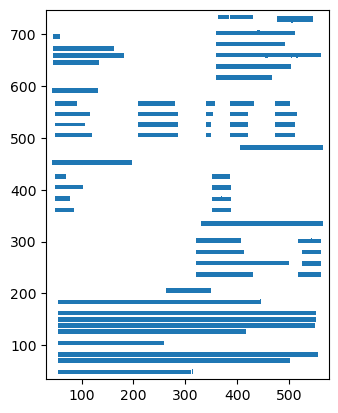

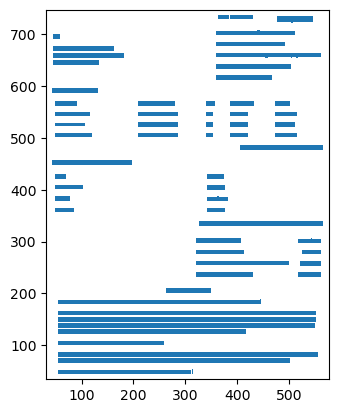

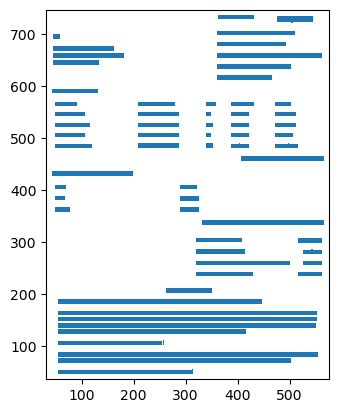

In [6]:
for text in list_tables:
    camelot.plot(text[0], kind='text').show()

### 表格识别

仅展示最后一份 PDF 文件。

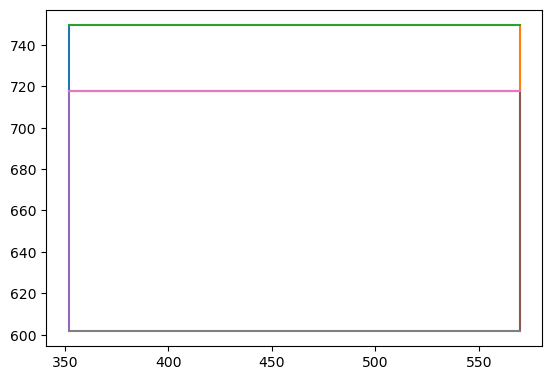

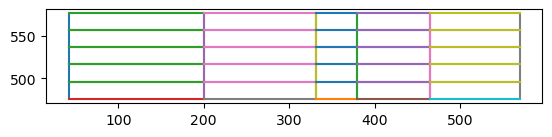

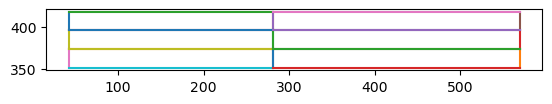

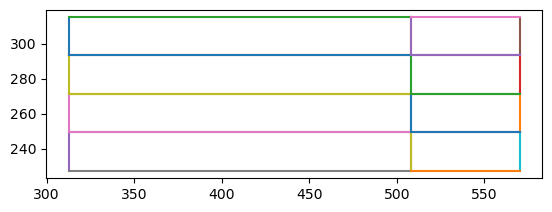

In [7]:
for grid in list_tables[-1]:
    camelot.plot(grid, kind='grid').show()

### 轮廓识别

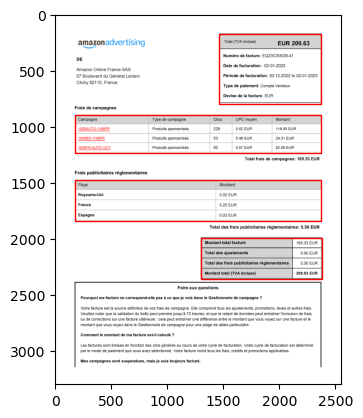

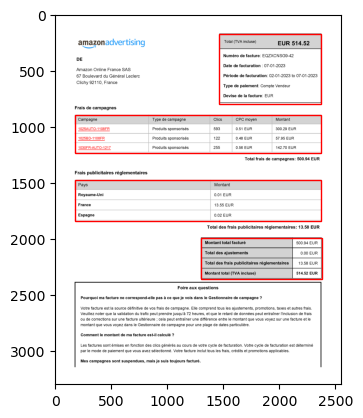

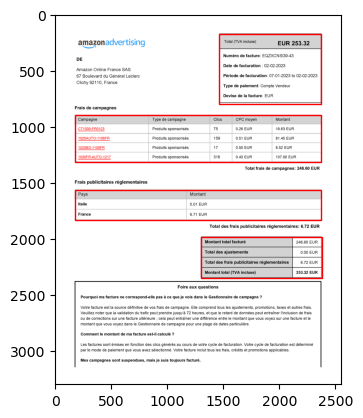

In [8]:
for contour in list_tables:
    camelot.plot(contour[0], kind='contour').show()

### 分割线识别

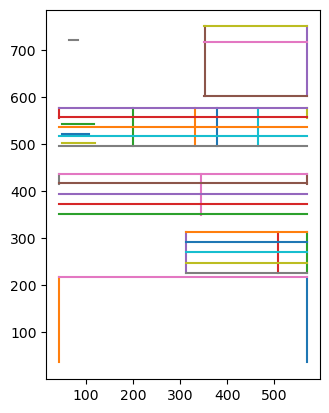

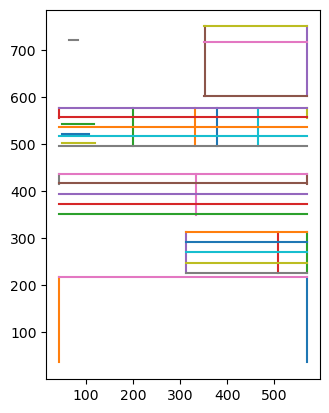

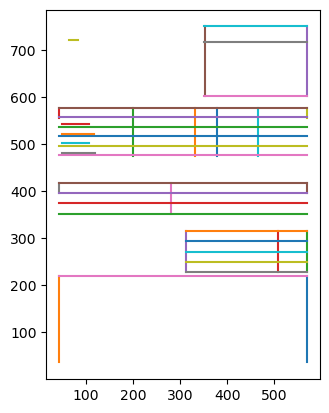

In [9]:
for line in list_tables:
    camelot.plot(line[0], kind='line').show()

### 连接识别

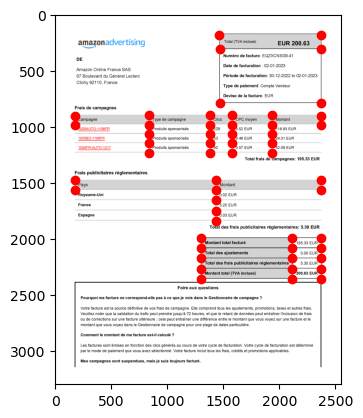

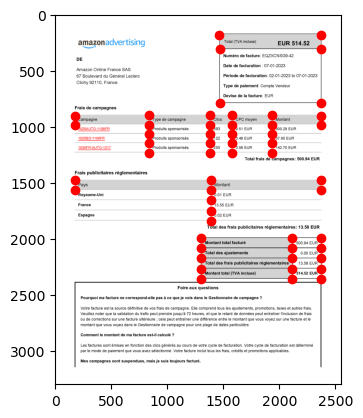

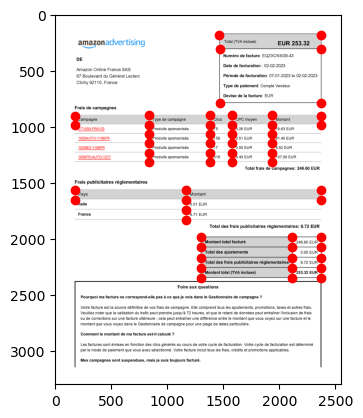

In [10]:
for joint in list_tables:
    camelot.plot(joint[0], kind='joint').show()

## 总结

综上，本次演示的 PDF 数据抓取准确率为 100%，已抓取全部表格，识别率为 100% 。